In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('Datasets/PTEN_MCF10A_stability_western.csv', index_col=False)

In [3]:
df1

,WT,K6E,K6I,R15S,M35V,P38H,G44D,A79T,D92N,H93Q,...,Y180H,M198I,T232A,P246L,N262S,D268E,D326N,K342N,P354Q,T382S
0,1,0.808306,1.445774,1.536240,1.028174,0.775659,0.939918,0.912592,0.768459,0.224249,...,0.935377,1.024303,1.297558,0.047453,0.762810,0.986761,0.448814,1.433570,1.434171,0.031431
1,1,0.639299,0.691646,0.820978,1.252605,1.083217,1.425349,0.401500,1.298532,0.754020,...,1.158817,1.151855,1.000477,0.569990,0.894262,1.216040,0.327991,1.480569,0.861570,0.004820
2,1,0.525062,0.650626,0.726461,1.054259,0.709967,0.922493,1.132100,1.304781,0.489063,...,1.484175,1.002279,0.770373,0.319792,0.799153,0.396584,0.667929,0.637068,1.138756,0.000686
3,0,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,...,4.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,4.000000,1.000000


In [4]:
color_code = df1.loc[3,:].tolist()

In [5]:
print(color_code)

[0.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 4.0, 1.0]


In [6]:
df1.drop([3], inplace=True)

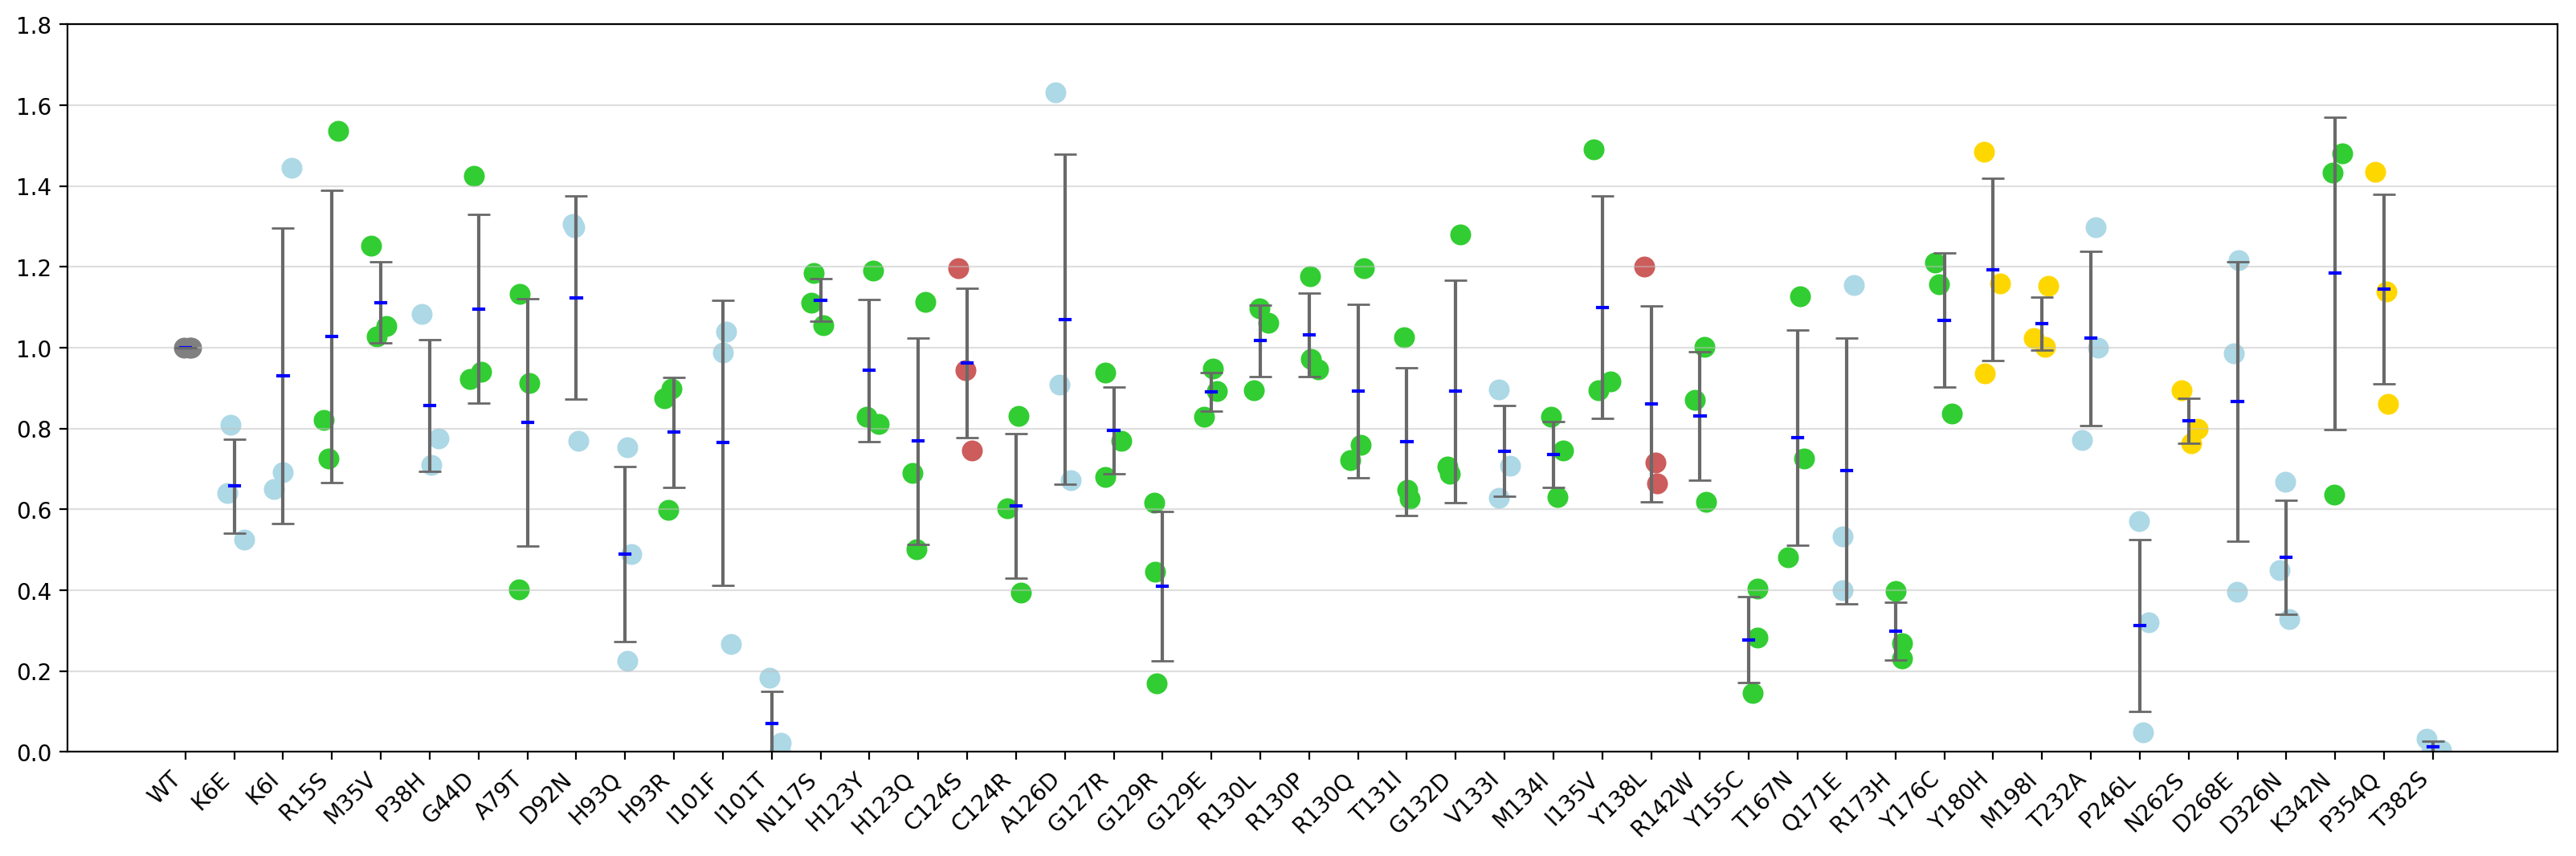

In [10]:
colors = {0:'grey', 1:'lightblue', 2:'limegreen', 3:'indianred', 4:'gold'}
width = 0.4
fig, ax = plt.subplots(figsize=(20, 6), dpi=200)

# plot scatter first
x = np.ones(len(df1))
for i, l in enumerate(df1.columns):
    x = np.ones(df1.shape[0])*i + (np.random.rand(df1.shape[0])*width-width/2.) #offset each dot
#    x = np.ones(df1.shape[0])*i #dots in vertical line
    ax.scatter(x, df1.iloc[:,i], 
               marker='o', s=70, 
               color=colors[color_code[i]])
    
# plot mean, error
width = 0.2
for i in range(len(df1.columns)):
    mean = df1.values[:,i].mean()
    yerr = np.std(df1.values[:,i])
    ax.plot([i-width/2., i+width/2.],[mean,mean], color="b")
    ax.errorbar(i, mean, yerr=yerr, capsize=5, color = 'dimgrey')
    
# set details
ax.grid(b=True, which='major', axis='y', color='silver', alpha=0.5)
ax.set_ylim(0,1.8)
ax.set_xticks(range(len(df1.columns)))
ax.set_xticklabels(df1.columns.tolist(), rotation = 45, ha="right")

# output figure
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/MCF10A_western_scatter.pdf', transparent=True)

plt.show(); plt.close()